In [1]:
from pulser import Pulse, Sequence, Register
from pulser.devices import MockDevice, AnalogDevice
from pulser import waveforms
from pulser_simulation import QutipEmulator
import qutip
import matplotlib.pyplot as plt
import numpy as np

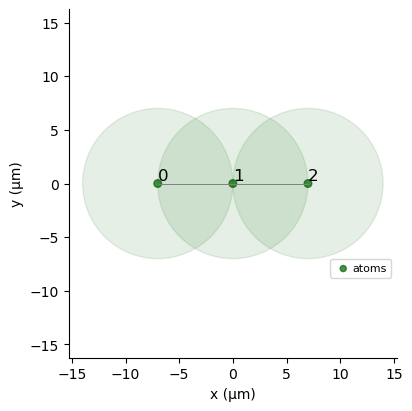

In [10]:
coords = [[-7, 0], [0,0], [7,0]]
reg = Register.from_coordinates(coords)
reg.draw(blockade_radius=14, draw_half_radius=True)

12.255056967376094


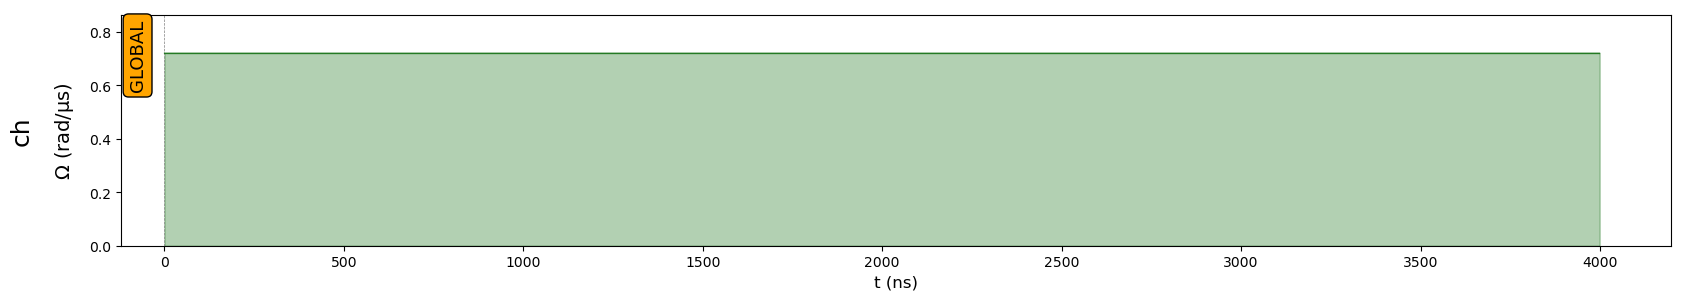

In [13]:
seq = Sequence(reg, MockDevice)
amp = MockDevice.rabi_from_blockade(14)
radius = MockDevice.rydberg_blockade_radius(1.6)
print(radius)
seq.declare_channel('ch', 'rydberg_global')
pulse = Pulse.ConstantPulse(4000, amp, 0, 0)
seq.add(pulse, 'ch')
seq.draw()

In [12]:
sim = QutipEmulator.from_sequence(seq)
res = sim.run()
res.sample_final_state(10000)

Counter({'101': 3267, '000': 3015, '010': 2114, '100': 821, '001': 783})